#Imports

In [ ]:
!pip install emoji
!pip install contractions
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=d80ab50da2770dad16398a73b83ddc812f3fd272823f4361743ceb203f89bbb4
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [ ]:

from google.colab import drive
import pandas as pd
import numpy as np
import string # from some string manipulation tasks
import nltk # natural language toolkit
import re # regex
from string import punctuation # solving punctuation problems
from nltk.corpus import stopwords # stop words in sentences
from nltk.stem import WordNetLemmatizer # For stemming the sentence
from nltk.stem import SnowballStemmer # For stemming the sentence
from contractions import contractions_dict # to solve contractions
from autocorrect import Speller #correcting the spellings
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
#Text cleaning
import re, string
import emoji
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
#Libraries for general purpose
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc
import plotly.express as px
#Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
#SVM
from sklearn.svm import SVC
#KNN
from sklearn.neighbors import KNeighborsClassifier
#RF
from sklearn.ensemble import RandomForestClassifier
#ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Importing the dataset

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/DataSetML/cyberbullying_tweets.csv')

In [ ]:
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [ ]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [ ]:
df.drop(df[df['cyberbullying_type'] == 'other_cyberbullying'].index, inplace = True)
df['cyberbullying_type'].value_counts()

religion             7998
age                  7992
gender               7973
ethnicity            7961
not_cyberbullying    7945
Name: cyberbullying_type, dtype: int64

#Data-Visualization

In [ ]:
new_df = df.copy()

In [ ]:
#label distribution
fig = px.bar(new_df.groupby('cyberbullying_type').agg('count').reset_index().rename({'tweet_text':'count'},axis=1).sort_values('count', ascending = False),
             x = 'cyberbullying_type',
             y = 'count',
             color = 'cyberbullying_type',
             opacity = 0.7,
             color_discrete_sequence = px.colors.diverging.curl,
             template = 'plotly_dark',
             title = 'Label Distribution',
            )
fig.show()

In [ ]:
#box plot for average length of tweet in a category
def average_word_length(text):
    words = text.split()
    word_count = len(words)
    word_length = 0
    for word in words:
        word_length += len(word)
    avg_word_length = round(word_length / word_count,2)
    return avg_word_length


new_df['tweet_length'] = new_df['tweet_text'].apply(lambda x: len(x.split()))
new_df['average_word_length'] = new_df['tweet_text'].apply(average_word_length)

In [ ]:
fig = px.box(new_df,
             x = 'cyberbullying_type',
             y = 'tweet_length',
             color = 'cyberbullying_type',
             color_discrete_sequence = px.colors.diverging.curl,
             template = 'plotly_dark',
             title = 'Boxplot of Tweet Lengths per class'
)


fig.update_yaxes(range = [0,80])
fig.show()

In [ ]:

fig = px.box(new_df,
             x = 'cyberbullying_type',
             y = 'average_word_length',
             color = 'cyberbullying_type',
             color_discrete_sequence = px.colors.diverging.curl,
             template = 'plotly_dark',
             title = 'Boxplot of Words Lengths per class'
)


fig.update_yaxes(range=[0,20])
fig.show()

In [ ]:
#Lexical Uniqueness
def unique_word_share(text):
    words = text.split()
    word_count = len(words)
    unique_word_count = len(set([w.lower() for w in words]))
    word_uniqueness = round(unique_word_count * 100/word_count,2)
    return word_uniqueness

new_df['lexical_uniqueness'] = new_df['tweet_text'].apply(unique_word_share)

In [ ]:
fig = px.box(new_df,
             y = 'cyberbullying_type',
             x = 'lexical_uniqueness',
             color = 'cyberbullying_type',
             color_discrete_sequence = px.colors.diverging.curl,
             template = 'plotly_dark',
             title = 'Boxplot of Lexical Uniqueness per class'
)

fig.show()

In [ ]:
#Most common words - wordcloud of all tweets
wordcloud = wc.WordCloud(stopwords = wc.STOPWORDS,
                         max_font_size = 80,
                         max_words = 5000,
                         width = 600,
                         height = 400,
                         background_color = 'black').generate(' '.join(txt for txt in new_df["tweet_text"]))

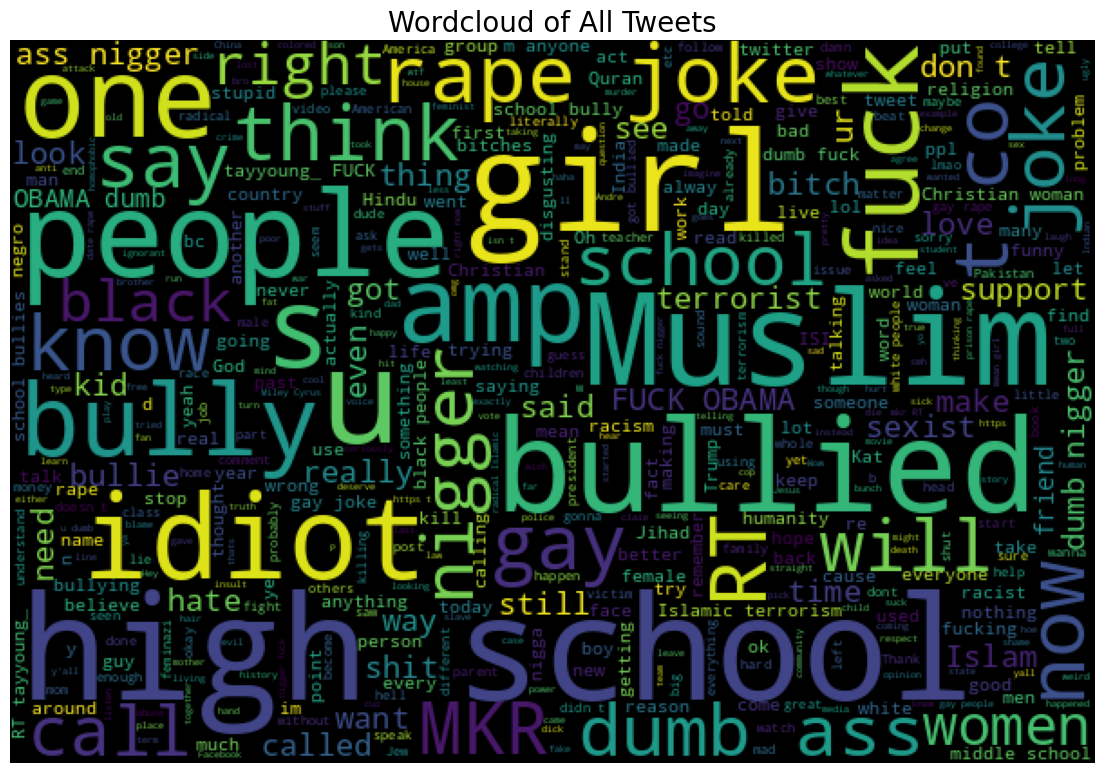

In [ ]:
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.title('Wordcloud of All Tweets', size = 20)
plt.imshow(wordcloud)

In [ ]:
new_df

,tweet_text,cyberbullying_type,tweet_length,average_word_length,lexical_uniqueness
0,"In other words #katandandre, your food was cra...",not_cyberbullying,9,5.89,100.00
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,14,7.29,100.00
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,9,5.78,100.00
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,18,4.72,100.00
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,18,4.72,94.44
...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,42,4.60,85.71
47688,Turner did not withhold his disappointment. Tu...,ethnicity,45,5.16,93.33
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,20,4.25,90.00
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,15,5.07,93.33


In [ ]:
fig = px.histogram(new_df,
                   x = 'tweet_length',
                   template = 'plotly_dark',
                   title = 'Distribution of Tweet Length',
                   color_discrete_sequence = ['#3ac2f9'],
                   opacity = 0.7,
                  )
fig.show()

#Text-Cleaning

In [ ]:
# Renaming columns for simpler use
df = df.rename(columns={'tweet_text': 'text', 'cyberbullying_type': 'sentiment'})

In [ ]:
df["sentiment"].replace({"religion": 1, "age": 2, "gender": 3, "ethnicity": 4, "not_cyberbullying": 5}, inplace=True)

In [ ]:
#Clean emojis from text
def strip_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U0001FB00-\U0001FBFF"  # Symbols for Legacy Computing
                               u"\U0001FC00-\U0001FCFF"  # Optional Glyphs for Legacy Computing
                               u"\U0001FD00-\U0001FDFF"  # Ornamental Dingbats
                               u"\U0001F004-\U0001F0CF"  # Playing Cards
                               u"\U0001F170-\U0001F251"  # Enclosed Alphanumeric Supplement
                               u"\U0001F300-\U0001F5FF"  # Miscellaneous Symbols And Pictographs
                               u"\U0001F600-\U0001F64F"  # Emoticons
                               u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r"", text)

def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    text =' '.join(word for word in text.split() if len(word) < 14) # remove words longer than 14 characters
    return text


#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the "#" symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as "&" and "$" present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

#Remove multiple sequential spaces
def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

#Stemming
def stemmer(text):
    tokenized = nltk.word_tokenize(text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])


In [ ]:
#Then we apply all the defined functions in the following order
def preprocess(text):
    text = strip_emoji(text)
    # text = decontract(text)
    text = strip_all_entities(text)
    text = clean_hashtags(text)
    text = filter_chars(text)
    text = remove_mult_spaces(text)
    text = stemmer(text)
    return text

In [ ]:
texts_cleaned = []
for t in df.text:
    texts_cleaned.append(preprocess(t))

df['text_clean'] = texts_cleaned

In [ ]:
df.head()

,text,sentiment,text_clean
0,"In other words #katandandre, your food was cra...",5,word katandandr food crapilici mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,5,aussietv white mkr theblock today sunris studi...
2,@XochitlSuckkks a classy whore? Or more red ve...,5,classi whore red velvet cupcak
3,"@Jason_Gio meh. :P thanks for the heads up, b...",5,meh p thank head concern anoth angri dude twitter
4,@RudhoeEnglish This is an ISIS account pretend...,5,isi account pretend kurdish account like islam...


In [ ]:
#removing duplicates
df["text_clean"].duplicated().sum()

1030

In [ ]:
df.drop_duplicates("text_clean", inplace=True)
df.sentiment.value_counts()

1    7947
2    7886
4    7748
5    7650
3    7608
Name: sentiment, dtype: int64

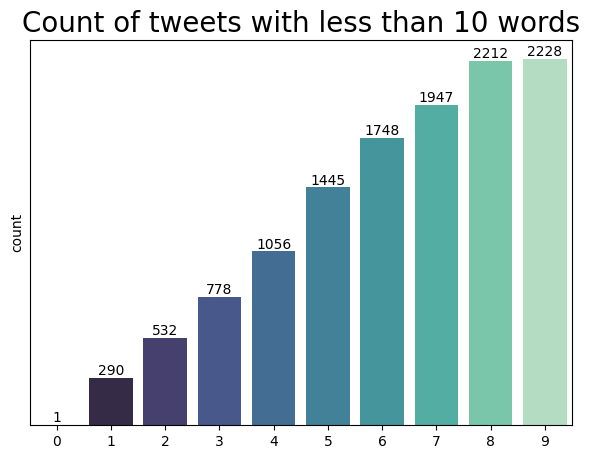

In [ ]:
#tweet length
text_len = []
for text in df.text_clean:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

df['text_len'] = text_len

plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df[df['text_len']<10], palette='mako')
plt.title('Count of tweets with less than 10 words', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [ ]:
# checking long tweets
df.sort_values(by=['text_len'], ascending=False)

,text,sentiment,text_clean,text_len
44035,You so black and white trying to live like a n...,4,black white tri live like nigger pahahahaha co...,190
45165,"@hermdiggz: “@tayyoung_: FUCK OBAMA, dumb ass ...",4,fuck obama dumb ass nigger bitch ltthi whore s...,164
1317,@EurekAlertAAAS: Researchers push to import to...,5,research push import top antibulli program us ...,146
33724,"... I don't feel guilty for killing him, I jus...",2,dont feel guilti kill feel guilti enjoy tormen...,138
47037,@Purely_Ambition: Sooo mad. RT @TracePeterson ...,4,sooo mad rt fuck obama dumb nigger im go switz...,126
...,...,...,...,...
3091,I am 12. http://t.co/ucZkXXFVxQ,5,12,1
173,#simpleasthat,5,simpleasthat,1
483,@Katrin_Salmani Lies. http://t.co/Qax81lnvg0,5,lie,1
5822,@wilw magnificent.,5,magnific,1


In [ ]:
#Removing tweets with less than 4 words and more than 100 words as they can be outlier
df = df[df['text_len'] > 3]
df = df[df['text_len'] < 100]
df

,text,sentiment,text_clean,text_len
0,"In other words #katandandre, your food was cra...",5,word katandandr food crapilici mkr,5
1,Why is #aussietv so white? #MKR #theblock #ImA...,5,aussietv white mkr theblock today sunris studi...,10
2,@XochitlSuckkks a classy whore? Or more red ve...,5,classi whore red velvet cupcak,5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",5,meh p thank head concern anoth angri dude twitter,9
4,@RudhoeEnglish This is an ISIS account pretend...,5,isi account pretend kurdish account like islam...,8
...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",4,black ppl arent expect anyth depend anyth yet ...,22
47688,Turner did not withhold his disappointment. Tu...,4,turner withhold turner call court abomin concl...,28
47689,I swear to God. This dumb nigger bitch. I have...,4,swear god dumb nigger bitch got bleach hair re...,13
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,4,yea fuck rt your nigger fuck unfollow fuck dum...,10


#Text into numbers

In [ ]:
tfidf = TfidfTransformer()
clf = CountVectorizer()

In [ ]:
X_cv =  clf.fit_transform(df['text_clean'])
tf_transformer = TfidfTransformer(use_idf=True).fit(X_cv)
X_tf = tf_transformer.transform(X_cv)

In [ ]:
X_tf

<37229x32974 sparse matrix of type '<class 'numpy.float64'>'
	with 515196 stored elements in Compressed Sparse Row format>

#Training Testing Split

In [ ]:
# train and test
X_train, X_test, y_train, y_test = train_test_split(X_tf, df['sentiment'], test_size=0.20, stratify=df['sentiment'], random_state=42)

In [ ]:
y_train.value_counts()

1    6318
2    6266
4    6170
3    5862
5    5167
Name: sentiment, dtype: int64

#Naive Bayes

In [ ]:
#Using naive bayes classifier
nb = MultinomialNB()

#Training the naive bayes classifier
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)

#Calculating the performance metrics
accuracy1 = accuracy_score(y_test, nb_pred)
precision1 = precision_score(y_test, nb_pred,average = 'weighted')
recall1 = recall_score(y_test, nb_pred, average = 'weighted')
f11 = f1_score(y_test, nb_pred, average = 'weighted')

In [ ]:
print('Accuracy for Naive Bayes: ', accuracy1)
print('Precision for Naive Bayes: ', precision1)
print('Recall for Naive Bayes: ', recall1)
print('F1 score for Naive Bayes: ', f11)

Accuracy for Naive Bayes:  0.8341391351060973
Precision for Naive Bayes:  0.8424776369872224
Recall for Naive Bayes:  0.8341391351060973
F1 score for Naive Bayes:  0.8172993059387403


#Support Vector Machines

In [ ]:
# Create an SVM classifier with a linear kernel (you can choose other kernel functions as well)
svm_clf = SVC(kernel='linear')

# Train the SVM classifier on your training data
svm_clf.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
# Make predictions using the SVM classifier
svm_pred = svm_clf.predict(X_test)

#Calculating the performance metrics
accuracy2 = accuracy_score(svm_pred, y_test)
precision2 = precision_score(y_test, svm_pred,average = 'weighted')
recall2 = recall_score(y_test, svm_pred, average = 'weighted')
f12 = f1_score(y_test, svm_pred, average = 'weighted')

In [ ]:
print('Accuracy for SVM: ', accuracy2)
print('Precision for SVM: ', precision2)
print('Recall for SVM: ', recall2)
print('F1 score for SVM: ', f12)

Accuracy for SVM:  0.9246575342465754
Precision for SVM:  0.9278162629970965
Recall for SVM:  0.9246575342465754
F1 score for SVM:  0.9254485653294068


#K-Nearest Neighbours

In [ ]:
knn = KNeighborsClassifier(n_neighbors=200)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [ ]:
# Calculating the performance metrics for KNN
accuracy3 = accuracy_score(y_test, knn_pred)
precision3 = precision_score(y_test, knn_pred, average='weighted')
recall3 = recall_score(y_test, knn_pred, average='weighted')
f13 = f1_score(y_test, knn_pred, average='weighted')

print('Accuracy for KNN: ', accuracy3)
print('Precision for KNN: ', precision3)
print('Recall for KNN: ', recall3)
print('F1 score for KNN: ', f13)

Accuracy for KNN:  0.8436744560838034
Precision for KNN:  0.8428434242947114
Recall for KNN:  0.8436744560838034
F1 score for KNN:  0.8267159236134463


#Random Forest

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, rf_pred)
precision_rf = precision_score(y_test, rf_pred, average='weighted')
recall_rf = recall_score(y_test, rf_pred, average='weighted')
f1_rf = f1_score(y_test, rf_pred, average='weighted')

print('Accuracy for Random Forest: ', accuracy_rf)
print('Precision for Random Forest: ', precision_rf)
print('Recall for Random Forest: ', recall_rf)
print('F1 score for Random Forest: ', f1_rf)

Accuracy for Random Forest:  0.9360730593607306
Precision for Random Forest:  0.9391529556506222
Recall for Random Forest:  0.9360730593607306
F1 score for Random Forest:  0.9366739585610916


#ANN

In [ ]:
scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()
#input layer
model.add(Dense(units=1024, activation='relu', input_dim=X_train.shape[1]))
#hidden layers
model.add(Dense(units=2048, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1024, activation='relu'))
#ouput layer
model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              33766400  
                                                                 
 dense_1 (Dense)             (None, 2048)              2099200   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 6)                 6150      
                                                                 
Total params: 37969926 (144.84 MB)
Trainable params: 37969926 (144.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/10
117/117 [==============================] - 20s 109ms/step - loss: 0.4143 - accuracy: 0.8529 - val_loss: 0.2620 - val_accuracy: 0.9055
Epoch 2/10
117/117 [==============================] - 6s 53ms/step - loss: 0.0728 - accuracy: 0.9766 - val_loss: 0.3171 - val_accuracy: 0.8967
Epoch 3/10
117/117 [==============================] - 7s 57ms/step - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.4039 - val_accuracy: 0.8967
Epoch 4/10
117/117 [==============================] - 4s 34ms/step - loss: 0.0083 - accuracy: 0.9976 - val_loss: 0.4943 - val_accuracy: 0.8927
Epoch 5/10
117/117 [==============================] - 3s 28ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.5287 - val_accuracy: 0.8940
Epoch 6/10
117/117 [==============================] - 3s 28ms/step - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.6010 - val_accuracy: 0.8936
Epoch 7/10
117/117 [==============================] - 2s 20ms/step - loss: 0.0015 - accuracy: 0.9994 - val_loss: 0.6252 - val_accuracy: 0.89

In [ ]:
predictions = model.predict(X_test)

233/233 [==============================] - 1s 2ms/step


In [ ]:
# Assuming 'predictions' is the output of your model for the test set
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate performance metrics
accuracy_nn = accuracy_score(y_true, y_pred)
precision_nn = precision_score(y_true, y_pred, average='weighted')
recall_nn = recall_score(y_true, y_pred, average='weighted')
f1_nn = f1_score(y_true, y_pred, average='weighted')

print('Accuracy for Neural Network: ', accuracy_nn)
print('Precision for Neural Network: ', precision_nn)
print('Recall for Neural Network: ', recall_nn)
print('F1 score for Neural Network: ', f1_nn)

Accuracy for Neural Network:  0.8951114692452323
Precision for Neural Network:  0.8939226150295249
Recall for Neural Network:  0.8951114692452323
F1 score for Neural Network:  0.8944346481514788


#Final Observations

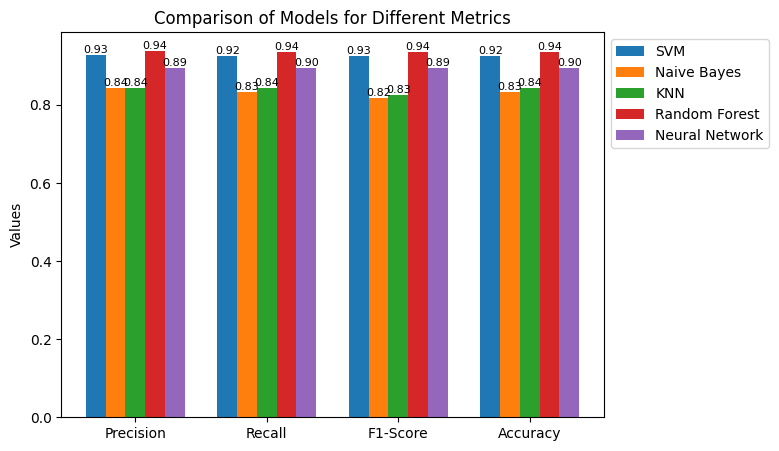

In [ ]:
svm_values = [precision2, recall2, f12, accuracy2]  # Values for SVM
nb_values = [precision1, recall1, f11, accuracy1]  # Values for Naive Bayes
knn_values = [precision3, recall3, f13, accuracy3]  # Values for KNN
rf_values = [precision_rf, recall_rf, f1_rf, accuracy_rf]  # Values for Random Forest
ann_values = [precision_nn, recall_nn, f1_nn, accuracy_nn]  # Values for Neural Network

models = ['SVM', 'Naive Bayes', 'KNN', 'Random Forest', 'Neural Network']
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']

# Combine the values for all models
all_values = np.array([svm_values, nb_values, knn_values, rf_values, ann_values])

# Plotting
fig, ax = plt.subplots(figsize=(7, 5))

bar_width = 0.15
bar_positions = np.arange(len(metrics))

for i, model in enumerate(models):
    # Handle varying number of metrics
    num_metrics = len(all_values[0])
    ax.bar(bar_positions + i * bar_width, all_values[i], width=bar_width, label=model)

ax.set_xticks(bar_positions + (len(models) - 1) * bar_width / 2)
ax.set_xticklabels(metrics)
ax.set_ylabel('Values')
ax.set_title('Comparison of Models for Different Metrics')

# Adjust legend placement to avoid overlap
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adding values on bars
for i, model in enumerate(models):
    for j, v in enumerate(all_values[i]):
        ax.text(bar_positions[j] + i * bar_width, v, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.show()